In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("house_price.csv")
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [3]:
data["Sqft"] = data["Sq.ft"]

In [4]:
data.drop(columns=['Furnishing','Old(years)','Sq.ft'],inplace=True)

In [5]:
data.head()

,Location,BHK,Floor,Price,Sqft
0,Bommanahalli,3,3,28000,3000
1,Bommanahalli,3,0,18000,1650
2,Whitefield,2,3,16400,1000
3,Whitefield,3,9,27000,1600
4,Whitefield,2,1,20000,1200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  1000 non-null   object
 1   BHK       1000 non-null   int64 
 2   Floor     1000 non-null   int64 
 3   Price     1000 non-null   int64 
 4   Sqft      1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
data.isnull().sum()

Location    0
BHK         0
Floor       0
Price       0
Sqft        0
dtype: int64

In [8]:
data.nunique()

Location     2
BHK          2
Floor       12
Price       26
Sqft        41
dtype: int64

In [9]:
data.shape

(1000, 5)

In [10]:
data.describe()

,BHK,Floor,Price,Sqft
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,3.465000,22829.900000,1448.613000
std,0.496135,3.245197,7706.410627,491.272535
min,2.000000,0.000000,11000.000000,767.000000
25%,2.000000,1.000000,16500.000000,1089.000000
50%,2.000000,3.000000,21000.000000,1300.000000
75%,3.000000,3.000000,26000.000000,1650.000000
max,3.000000,13.000000,45000.000000,3155.000000


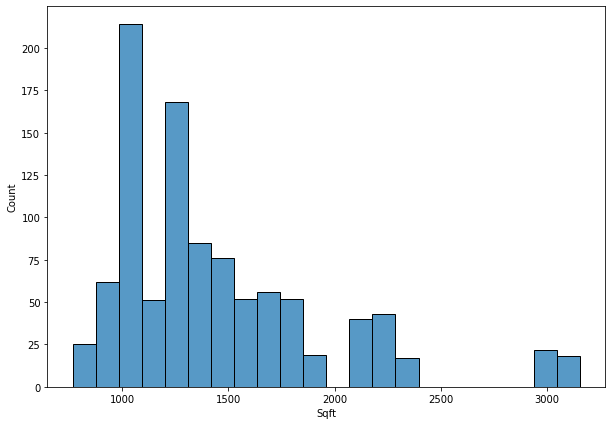

In [11]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=data, x="Sqft")
plt.show()

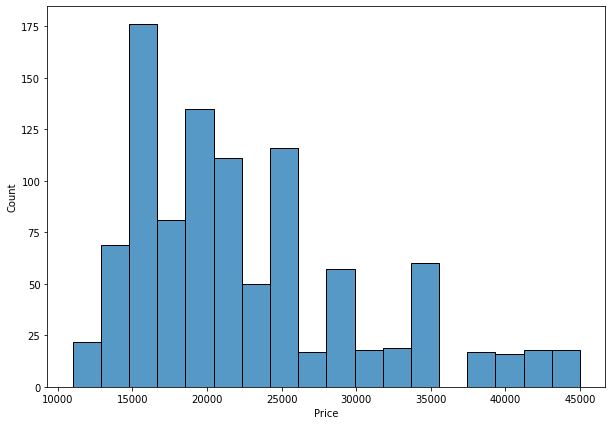

In [58]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data=data, x="Price")
plt.show()

C:\Users\ANANYA MAURYA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


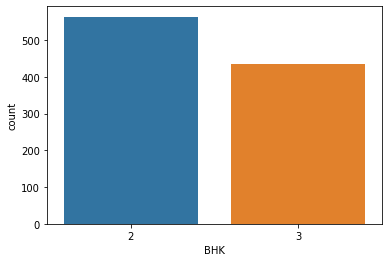

C:\Users\ANANYA MAURYA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


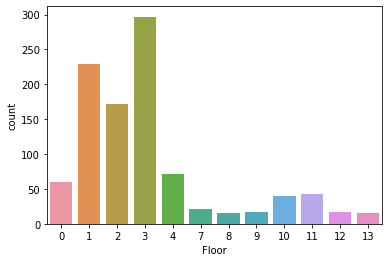

In [70]:
sns.countplot(data['BHK'])
plt.show()
sns.countplot(data['Floor'])
plt.show()

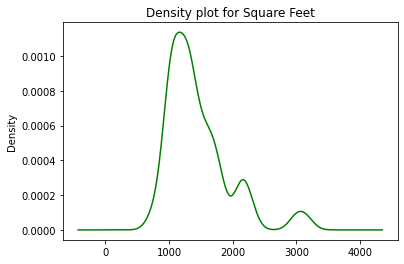

In [71]:
data.Sqft.plot.density(color='green')
plt.title('Density plot for Square Feet')
plt.show()

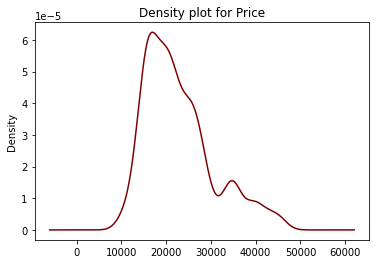

In [72]:
data.Price.plot.density(color='maroon')
plt.title('Density plot for Price')
plt.show()

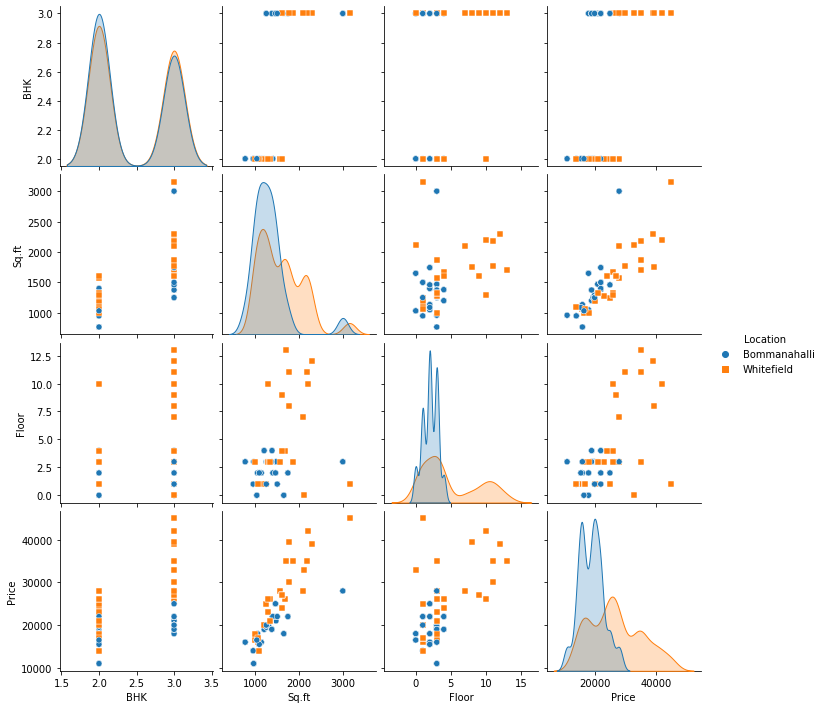

In [11]:
sns.pairplot(data, hue="Location", markers=["o", "s"]);

In [12]:
data.corr()

,BHK,Floor,Price,Sqft
BHK,1.000000,0.337754,0.633094,0.689055
Floor,0.337754,1.000000,0.599192,0.376009
Price,0.633094,0.599192,1.000000,0.831104
Sqft,0.689055,0.376009,0.831104,1.000000


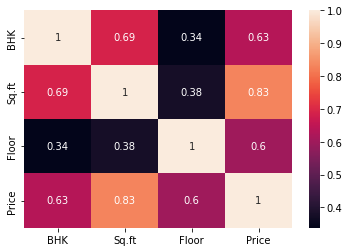

In [12]:
sns.heatmap(data.corr(), annot = True);

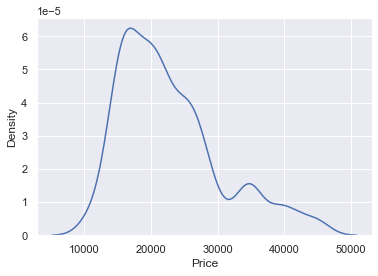

In [13]:
sns.set() 
sns.kdeplot(data['Price']);

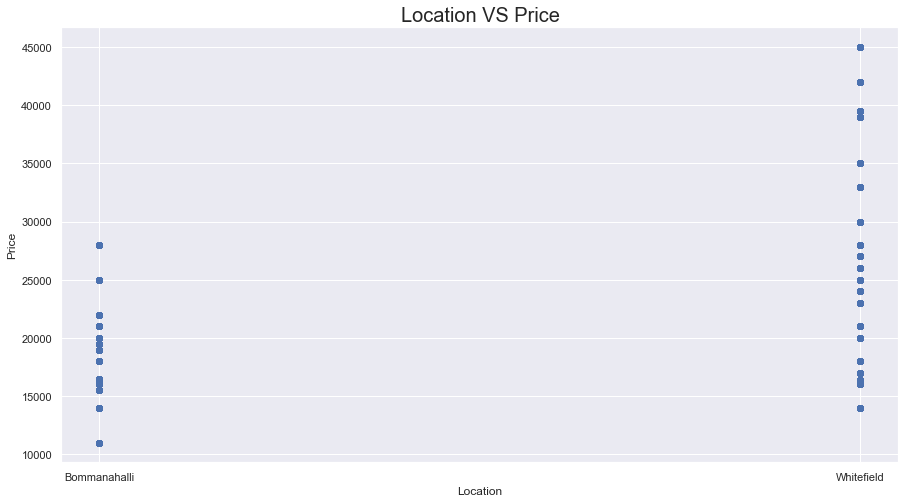

In [14]:
plt.figure(figsize=(15,8))
plt.scatter(data["Location"],data["Price"])
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("Location VS Price",size=20)
plt.show()

## CLEANED DATA

In [15]:
data.to_csv("Cleaned_house_price.csv")

### Initializing the variable

In [16]:
x = data.drop(columns='Price')
y = data['Price']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Location']),remainder='passthrough')

In [27]:
pipe = make_pipeline(column_trans, scaling, lr)

In [30]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [31]:
y_pred_lr = pipe.predict(x_test)

## Calculating the R squared value

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr)

0.8497802957475827

## Save and Load Machine Learning Model

In [35]:
import pickle

In [36]:
with open('finalized_model.pickle','wb') as f:
    pickle.dump(pipe,f)